# WENO Reconstruction
[]: # (C) 2017-2024, Manuel A. Diaz

In [1]:
# Load everything from sympy
from sympy import *
init_printing(use_unicode=True)

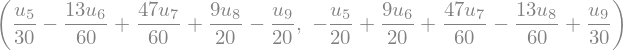

In [2]:
# WENO reconstruction
x = Symbol('x')
dx = Symbol('dx')
U = symbols('u_0:10')

# Define primitive function U(x) that integrates u(x), a continuous function, over a grid of cell averages 
def U_primitive(n) :
    return sum(dx * U[i] for i in range(0, n+1))

# Define the 5-point stencil
Xdata = [-3*dx, -2*dx, -dx, 0, dx, 2*dx]
Udata = [U_primitive(4), U_primitive(5), U_primitive(6), U_primitive(7), U_primitive(8), U_primitive(9)]

# Compute the 5-point stencil interpolant to the Right of the interface
pR5 = polys.specialpolys.interpolating_poly(6, x, X=Xdata, Y=Udata).diff(x, 1).subs(x, 0).expand()

# Compute the 5-point stencil interpolant to the Left of the interface
pL5 = polys.specialpolys.interpolating_poly(6, x, X=Xdata, Y=Udata).diff(x, 1).subs(x, -dx).expand()

# Display the interpolants
pR5, pL5


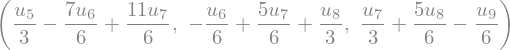

In [3]:
# Compute sub-stencils of the 5-point stencil to the right of the interface
p1R = polys.specialpolys.interpolating_poly(4, x, X=Xdata[0:4], Y=Udata[0:4]).diff(x, 1).subs(x, 0).expand()
p2R = polys.specialpolys.interpolating_poly(4, x, X=Xdata[1:5], Y=Udata[1:5]).diff(x, 1).subs(x, 0).expand()
p3R = polys.specialpolys.interpolating_poly(4, x, X=Xdata[2:6], Y=Udata[2:6]).diff(x, 1).subs(x, 0).expand()

# Display the interpolants
p1R, p2R, p3R

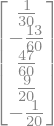

In [4]:
# Arrange the sub-stencils into a matrix
A = zeros(5,3)
A[0:3,0] = Matrix([p1R.coeff(U[5]), p1R.coeff(U[6]), p1R.coeff(U[7])])
A[1:4,1] = Matrix([p2R.coeff(U[6]), p2R.coeff(U[7]), p2R.coeff(U[8])])
A[2:5,2] = Matrix([p3R.coeff(U[7]), p3R.coeff(U[8]), p3R.coeff(U[9])])
A
b = Matrix([pR5.coeff(U[5]), pR5.coeff(U[6]), pR5.coeff(U[7]), pR5.coeff(U[8]), pR5.coeff(U[9])])
b

In [5]:
# Linear weights
gamma = A.LUsolve(b)
gamma.T

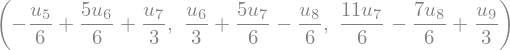

In [6]:
# Compute sub-stencils of the 5-point stencil to the left of the interface
p1L = polys.specialpolys.interpolating_poly(4, x, X=Xdata[0:4], Y=Udata[0:4]).diff(x, 1).subs(x, -dx).expand()
p2L = polys.specialpolys.interpolating_poly(4, x, X=Xdata[1:5], Y=Udata[1:5]).diff(x, 1).subs(x, -dx).expand()
p3L = polys.specialpolys.interpolating_poly(4, x, X=Xdata[2:6], Y=Udata[2:6]).diff(x, 1).subs(x, -dx).expand()

# Display the interpolant
p1L, p2L, p3L